# Final Tutorial - Analysis of the Million Song Dataset

### By Akash Chawla, Kishan Segu, Philip Lo

### Overview

Music has become part of many people’s lifestyles over time. It is a form of both personal expression and a kind of social interaction. Music consumption has increased tremendously over the past few years, and a number of companies such as Spotify, Gaana.com, Saavn, Pandora etc. have emerged providing streaming services. With the increasing availability of these streaming services and Bluetooth headsets, we have started to spend more time finding and adding songs to our playlists. By recommender users the music they like, companies are able to lure more customers and thus generate more revenue. With this change in the industry, music recommendations becomes increasingly important for customers in order to lure them into their streaming service. In this notebook, we will analyze and explore the Million Song Dataset, and find relationships between various features. Ultimately, we will also look into recommender systems, and how they're personalized for different individuals based on past history, or finding similar users in such a way that they like similar music.


The dataset we are using is the Million song dataset, which is a freely-available collection of audio features and metadata for a million contemporary popular music tracks. The dataset was taken from:

https://labrosa.ee.columbia.edu/millionsong/

Since this dataset is approximately 280GB in size, we'll be working with a subset of data in order to conduct our analysis. 

## Importing Libraries
- Numpy is imported since pandas relies on numpy to function
- Pandas is imported because of its ease of use. In this project we don't have any SQL files nor do we need to perform any SQL database related commands. In the case we do need SQL, pandas also supports that thus it's the best option for us
- Matplotlib is imported for graphing. It's heavily used in the data exploration section to get some visualization of the data. The %matplotlib inline command tells matplotlib to present graphs in order with the code in the cells
- Seaborn is used in the same manner as matplotlib but for more advanced visualization such as heatmaps
- Sklearn is imported for use in the ML section of this tutorial. The KMeans library was specifically imported to partition our data into clusters based on the features we choose 

Furthermore, we would recommend using Jupyter Notebook for this tutorial since Python is already included, and importing all the necessary libraries is very easy.

In [45]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plts
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
%matplotlib inline

## Reading in Dataset
The Million Songs Dataset we have is a csv file so we read it in with pandas. The datafile is relatively large so we will look at the first 20 rows rather than the default first 5 given by the head() function. Taking an initial look at the data file we see that there are some immediate issues with the dataset. There is an unnamed column with entries that correspond to the index of each row. There is also some missing data in artist.playmeid with with multiple entries having an id of -1. In the year column, there are multiple rows with entries of 0 all of which are missing data. The songs are identified by song.id rather than song name.

In [2]:
df = pd.read_csv('MSD.csv')
print("Rows: ",len(df))
df.head(n=20)

Rows:  9579


,Unnamed: 0,song.id,analysis.sample.rate,artist.7digitalid,artist.familiarity,artist.hotttnesss,artist.playmeid,danceability,duration,end.of.fade.in,...,loudness,mode,mode.confidence,release.7digitalid,song.hotttnesss,start.of.fade.out,tempo,time.signature,time.signature.confidence,year
0,1,TRPLYLH128F425369C,22050,4645,0.617473,0.442949,45433,0,238.10567,0.160,...,-8.835,0,0.438,198616,0.405116,224.525,104.816,4,0.000,0
1,2,TRPLYFZ128F4264C9A,22050,155352,0.080125,0.000000,-1,0,404.42730,6.327,...,-22.535,0,0.521,94537,0.356064,388.116,75.482,5,0.572,0
2,3,TRPLYQQ128F92ECB8F,22050,4822,0.578104,0.414893,8349,0,37.51138,0.000,...,-19.491,1,0.000,332823,0.000000,37.511,77.241,7,0.470,1997
3,4,TRPLYAH128F426B9CD,22050,15926,0.780647,0.549752,1241,0,174.31465,2.090,...,-14.435,1,0.683,155108,0.000000,162.702,116.055,4,1.000,1995
4,5,TRPLYFV128F4229C98,22050,180632,0.462806,0.309038,58733,0,451.81342,0.334,...,-14.402,1,0.553,233993,0.000000,439.832,149.068,5,0.797,2000
5,6,TRPLYCI128F4268FF3,22050,198506,0.380514,0.274895,-1,0,131.55220,0.150,...,-6.843,1,0.348,260175,0.356064,128.993,164.758,4,0.000,1994
6,7,TRPLYMZ128F4266161,22050,37086,0.640154,0.514873,-1,0,267.98975,0.183,...,-14.774,0,0.602,152901,0.664173,257.341,129.962,4,0.692,2007
7,8,TRPLYYO128F42AAFAE,22050,11414,0.577326,0.458286,14641,0,72.56771,0.000,...,-14.572,1,0.249,227207,0.356064,72.568,130.281,5,0.090,0
8,9,TRPLYCI128F4248CCC,22050,27528,0.504219,0.365747,14716,0,248.65913,0.206,...,-25.030,1,0.454,235502,0.356064,238.132,137.868,3,0.674,0
9,10,TRPLYIZ128F425F653,22050,117275,0.349195,0.270440,99454,0,217.10323,0.000,...,-6.714,1,0.408,150666,0.000000,217.103,126.872,1,0.000,0


## Checking and Cleaning up Dataset

We know that the unameed column corresponds to indexing so we can drop that column, then check for any columns that have all data missing. We do this by writing a function that iterates through each row of each column and checks for repeating values.

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
repeated = []
for col in df.columns.values:
    # First entry of the column
    repeat_val = df[col][0]
    # Length of dataframe with all same repeating entries
    repeat_count = len(df[df[col] == repeat_val])
    # if number of repeating entries is number of rows in dataframe then add to array
    if repeat_count == len(df):
        repeated.append({col : [repeat_count, repeat_val]})
repeated

[{'analysis.sample.rate': [9579, 22050]},
 {'danceability': [9579, 0]},
 {'energy': [9579, 0]}]

Notice that the analysis sample rate column is not missing data since 22050 is the sample rate. For the danceability column and energy column, they're both missing data since their entries are all 0, so we can delete those columns. Since we're modifying columns, lets replace the '.' in each column name with '_' for better readibility.

In [5]:
df.drop('energy', axis= 1, inplace=True)
df.drop('danceability', axis =1, inplace=True)
new_col = {}
for i, col in enumerate(df.columns.values):
    original_name = col
    new_name = original_name.replace('.', "_")
    new_col[original_name] = new_name
new_col['year'] = 'release_year'
df.rename(columns=new_col, inplace=True)

## Exploratory Data Analysis

For the first task in exploring the data we need to get a general idea of how each column in the data set is related to each other so we will calculate a correlation matrix and plot it with a heat map

In [6]:
df_corr = df.corr()
df_corr

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_playmeid,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,release_7digitalid,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,release_year
analysis_sample_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_7digitalid,NaN,1.000000,-0.391260,-0.353097,-0.008733,0.013331,0.001005,0.003351,-0.028588,0.043825,-0.004282,-0.041210,0.416869,-0.117239,0.014718,0.022791,-0.001645,0.000427,-0.156682
artist_familiarity,NaN,-0.391260,1.000000,0.714890,-0.061023,0.005571,0.008023,0.003880,0.004074,0.156945,0.006477,0.012505,-0.118696,0.352373,0.005107,0.036192,0.044526,0.012860,0.314625
artist_hotttnesss,NaN,-0.353097,0.714890,1.000000,-0.045588,-0.000279,0.010385,0.008445,0.001198,0.103818,0.010472,0.010436,-0.093741,0.325588,-0.000867,0.027205,0.035816,0.011484,0.296504
artist_playmeid,NaN,-0.008733,-0.061023,-0.045588,1.000000,0.000915,-0.009899,-0.016047,0.014460,-0.008550,0.005835,0.005993,-0.001354,-0.012905,0.000171,-0.001362,-0.011845,-0.010855,-0.036772
duration,NaN,0.013331,0.005571,-0.000279,0.000915,1.000000,0.125290,0.024236,0.048691,0.029550,-0.072588,0.014606,0.035740,0.006045,0.996933,-0.004888,0.111450,0.100313,-0.008335
end_of_fade_in,NaN,0.001005,0.008023,0.010385,-0.009899,0.125290,1.000000,-0.002826,0.004336,-0.128811,-0.005718,0.011189,-0.020941,0.019808,0.120245,-0.015317,0.013867,0.000633,0.013135
key,NaN,0.003351,0.003880,0.008445,-0.016047,0.024236,-0.002826,1.000000,-0.035850,0.041272,-0.225173,-0.027140,0.001264,0.006356,0.024975,0.012941,0.014852,0.019636,0.008397
key_confidence,NaN,-0.028588,0.004074,0.001198,0.014460,0.048691,0.004336,-0.035850,1.000000,0.025215,0.122849,0.777173,-0.002395,0.011546,0.046343,0.057392,-0.077332,-0.047816,0.013022
loudness,NaN,0.043825,0.156945,0.103818,-0.008550,0.029550,-0.128811,0.041272,0.025215,1.000000,-0.000473,-0.002655,0.026246,0.115442,0.034586,0.190569,0.122519,0.039965,0.082242


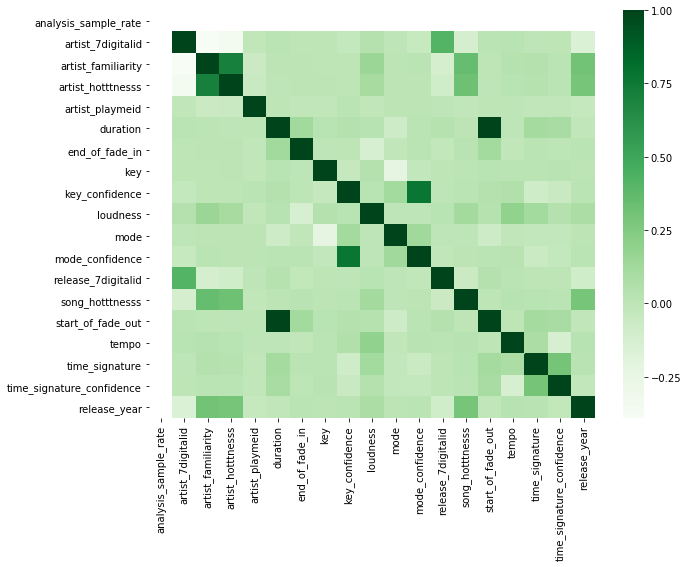

In [7]:
a4_dims = (10, 7.5)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(df_corr, ax=ax, cmap="Greens")

There is a white stripe for analysis_sample_rate in both the x and y axis but is expected since the entries in the sample rate the same throughout. There is a dark green stripe down the middle which is to be expected of a correlation matrix as each column perfectly correlates to itself. Noticable hotspots to be explored in the later sections are

1. duration to start_of_fade_out
2. key_confidence to mode_confidence
3. artist_familiarity to release_year
4. artist_hotttness to release_year
5. song_hotttness to loudness

### 1. Duration vs Start_of_Fade_Out

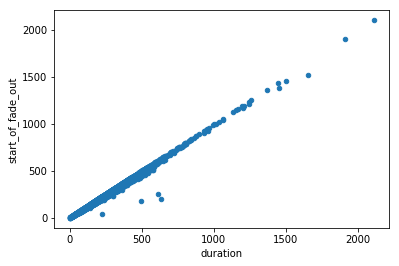

In [122]:
df.plot(x='duration', y='start_of_fade_out', kind='scatter')

As song duration increases there is a linear increase in time of start_of_fade_out. Thus the strong correlation.

### 2. Key_confidence vs mode_confidence

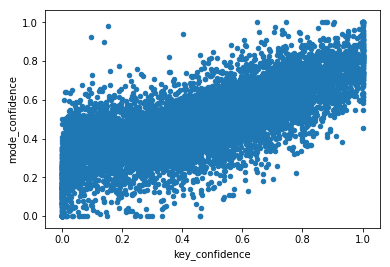

In [9]:
df.plot(x='key_confidence', y='mode_confidence', kind='scatter')

The spread here also seem to be linear, as key_confidence increases there is a linear increase in mode_confidence.

### 3. release_year vs artist_familiarity

/home/philip/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


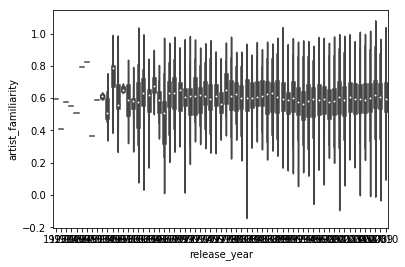

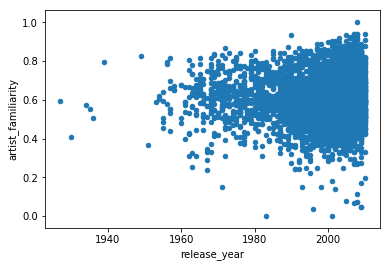

In [10]:
df_temp = df[df['release_year'] != 0]
sns.violinplot(x=df_temp['release_year'], y=df_temp['artist_familiarity'])
df_temp.plot(x='release_year', y='artist_familiarity', kind='scatter')

There is a lot of missing data with regard to release year, so we only plot rows with non-missing release_years. A pattern to notice is that as release year gets closer to the 2000s there is a linear increase in artist_familiarity, although there is also a large amount of spread. The most likely cause for this is the prevalence of internet and TV, making music more accessible and trackable. Notice that the average artist familiarity statys relatively consistant throughout, so the increase in artist_familiarity only occurs in the extremes

### 4. Release_year vs artist_hotttnesss

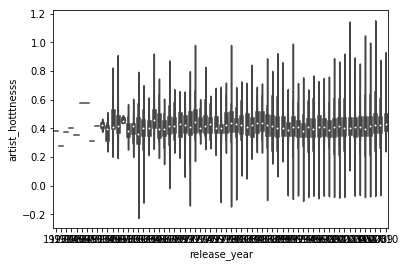

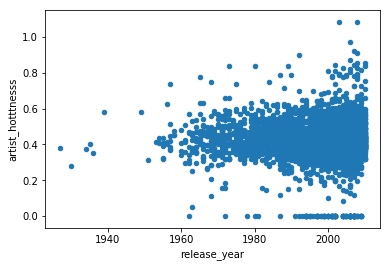

In [11]:
sns.violinplot(x=df_temp['release_year'], y=df_temp['artist_hotttnesss'])
df_temp.plot(x='release_year', y='artist_hotttnesss', kind='scatter')

The same story applies here, there is a lot of missing data so we only graph the rows with non missing release years. The pattern which emerges is that there is a increase in artist hotness at the outliers for later release years, but there is also a large spread to go along the increase. The cause for this spread and increase seems to also be correlated to the prevalence of technology. Another thing to notice is that the average hotness seem to be relatively consistant throughout the years as seen in the violin plot.

### 5. Song_hotttnesss vs loudness

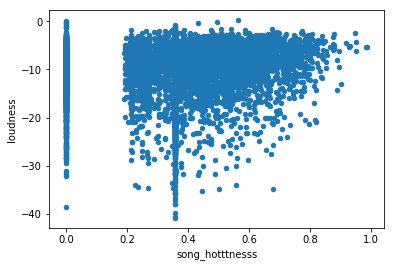

In [12]:
df.plot(x='song_hotttnesss', y='loudness', kind='scatter')

Song hotttness seem is centered around [0.2, 0.8] louder songs having an inclination to be hotter songs but loudness seems to be within the range [-20,0]. 

## Further Data Exploration

From the 5 hottest spots on the heat map, we've found that artist hotttness and familiarity increases in later release years and that song hotness and loudness seem to gather around a central area. But in general we haven't explored areas less heated in the heatmap but we think is still correlated, namely these are
    1. song hotness vs tempo
    2. song hotness vs artist hotness

### 1. Song Hotness vs Tempo

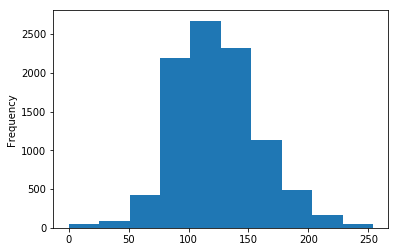

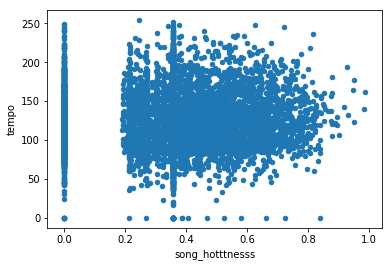

In [13]:
df.tempo.plot.hist()
df.plot(x='song_hotttnesss', y='tempo', kind='scatter')

Song hotness is mostly around [0.2,0.8] while tempo seems to center in on [50, 200]. The histogram displays that the most frequent tempo is around 100 to 150 which agrees with the scatter plot as the hottest songs seem to thin out around [100, 150] in terms of temp. One thing particularly noticable is that less hot songs seem to be more spread out in tempo and hotter songs seem to narrow down to specific tempos with a few outliers above and below.

### 2. Song Hotness vs Artist Hotness

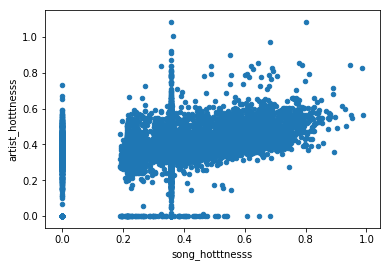

In [14]:
df.plot(x = 'song_hotttnesss', y = 'artist_hotttnesss', kind = 'scatter')

In the song hotness custer between [0.2, 0.8] there is a linear increase in artist hotness as song hotness increases. Also to be noted is that as song hotness increases towards the top end artist hotness seems to gather between [0.4, 0.6] while for less hot songs there is a particularly large spread in artist hotness.

### The following plot depicts that the songs in our dataset range from the year 1960-2005, with songs from 1990-2005 being the highest in number. 

We also see that the frequency of counts start to take off in 1980s. This could probably be attributed to the invention of CDs during that era. 

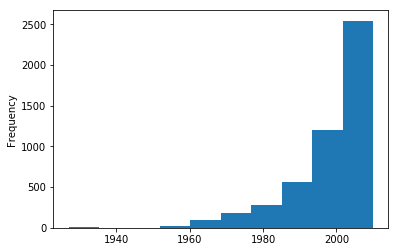

In [15]:
df_temp.release_year.plot.hist()

### Random Forest 

The Million Song Dataset has a lot of features, and we particularly don't know what features are important. We don't want our model to suffer from overfitting by having a lot of features that we have to tune, and also not have too less features such that our model doesn't depict true behaviour of the dataset.

Hence, we need a way to show what features are important and what aren't. For this, we are going to use a Random forest algorithm, which consists of a number of decision trees. A single node in the tree depicts a condition of a single feature, which also splits the dataset into two so that similar values are in the same set. For more information on Random Forests, and how the algorithm works, you can check out this link: 

https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd



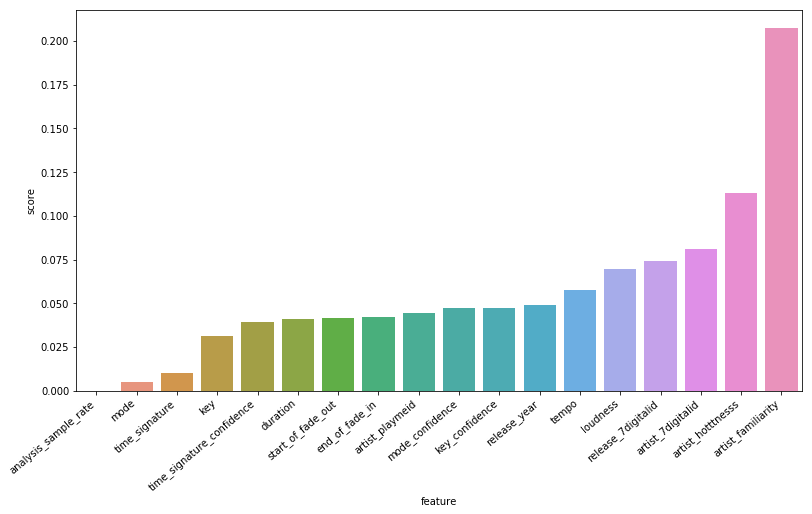

In [116]:
from sklearn.ensemble import RandomForestRegressor
X = df_temp.drop(['song_hotttnesss'],axis=1).select_dtypes(exclude = ['object'])
Y = df_temp['song_hotttnesss']

RF_model = RandomForestRegressor(n_estimators=18,max_depth=50)
RF_model.fit(X,Y)

df_features = pd.DataFrame({'feature': X.columns, 'score': model.feature_importances_})
df_features.sort_values('score', inplace=True, ascending=True)

a4_dims = (13, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.barplot(x=df_features['feature'], y = df_features['score'])

### Conclusion from Random Forest

From the plot above, we conclude that artist_familiarity, artist_hotness, loudness and tempo of the music are some of the important feature models. This also corresponds to the features that had strong correlations from our first heatmap

In [117]:
features = df[['song_hotttnesss', 'artist_hotttnesss', 'duration', 'loudness', 'release_year', 'artist_familiarity', 'tempo']]

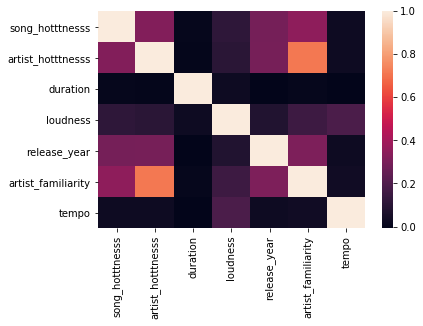

In [118]:
sns.heatmap(features.corr())

### Clustering 

Clustering is a type of unsupervised learning, which is usually used when we do not have labeled data. The algorithm finds groups clusters in a given data. For this dataset, we have used K-Means Clustering algorithm, which is one of the clustering algorithms.

For more information on clustering, you can check out this link, which explains how the algorithm works iteratively to group clusters. 

https://mubaris.com/posts/kmeans-clustering/

In order to determine which song should be played after a given song, the algorithm must find a similar song. An easy way to accomplish this is to cluster all the songs into groups. When a song is played, the following song will be one in the same cluster. 

The data visualization was important in deciding our clustering algorithm. The heatmap showed which of the features influence each other. This advised us on what we should choose as the feature we use to cluster our data.

We used artist hotness and song hotness since they had strong correlations. 

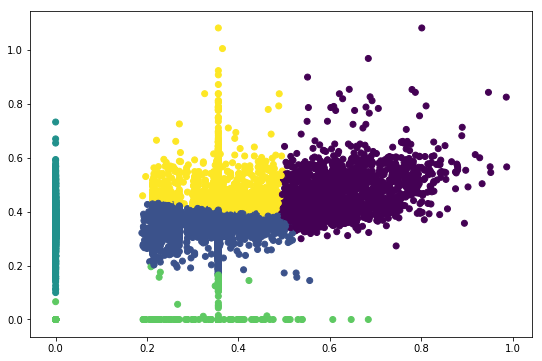

In [119]:
a4_dims = (9, 6)
fig, ax = plt.subplots(figsize=a4_dims)
from matplotlib.pyplot import figure
y_pred = KMeans(n_clusters=5).fit_predict(df[['song_hotttnesss', 'artist_hotttnesss']])
x = np.arange(0.0, 1000.0, 1.0)
plts.scatter(df['song_hotttnesss'], df['artist_hotttnesss'], c=y_pred)


## Predicting Duration vs Start of fadeout

As shown in the data exploration section, there is a clear linear correlation between duration and start of fade out, so a linear model should predict this data near perfectly.

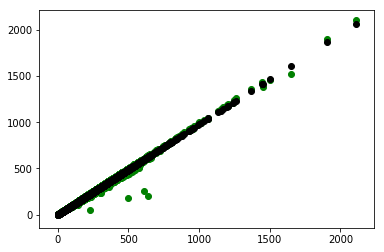

duration at 1800: [1759.42123773]


In [88]:
length = len(df['duration'])
x = df['duration'].values.reshape(length, 1)
y = df['start_of_fade_out']
reg = LinearRegression()
reg.fit(x, y)
plts.scatter(x, y, color='g')
plts.scatter(x, reg.predict(x), color='k')
plts.show()
print('duration at 1800:', reg.predict([[1800]]))

The prediction is as good as we expected since the data is completely linear with very little spread. For a test value in between two points we picked 1800 for song duration. The start of fade out occurs also at 1759 thus is exactly in line with both the data and predictor.

## Predicting Artist Hotness based on Release Year

From the heat maps and further exploration, we saw a large correlation in release years and artist hotttness which showed a linear increase on the top end while the average hotness stayed relatively consistant. We're going to use those observations to predict artist hotness with linear regression. Then evaluate the accuracy of our prediction. We're expecting a bad prediction due to the huge spread in data as we get closer to the 2000s.

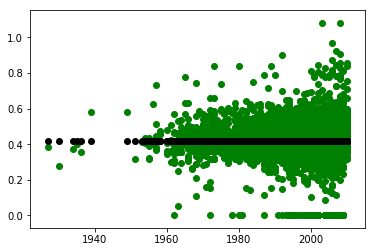

In [48]:
length = len(df_temp['release_year'])
x = df_temp['release_year'].values.reshape(length, 1)
y = df_temp['artist_hotttnesss']
reg = LinearRegression()
reg.fit(x, y)
plts.scatter(df_temp['release_year'], df_temp['artist_hotttnesss'], color='g')
plts.scatter(df_temp['release_year'], reg.predict(x), color='k')
plts.show()

As seen in this graph, the linear model is definitly not a good predictor for artist hottness based on release year as our predictor plots a straight line when in fact the data is highly spread out. So we need a different predictor given that our data is quite noisy, lets try a decision tree regressor since we can overfit the data.

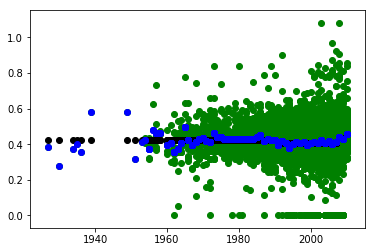

In [52]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(x, y)
regr_2.fit(x, y)
plts.scatter(x, y, color='g')
plts.scatter(x, regr_1.predict(x), color='k')
plts.scatter(x, regr_2.predict(x), color='b')
plts.show()

The decision tree regressor faired marginally better but not much, as seen in the graph. Even when we try to overfit the data, the predictor is still predicting a straight line that corresponds with the mean thus Release year is not a good predictor for artist hotttness given our current dataset.

## Predicting song hotness with artist hotness

Since the plot between song hotness and artist hotness showed a linearly increasing middle cluster with a more uniform spread than the plot between release year and artist hotness, a decision tree regression model should work as a predictor in this instance.

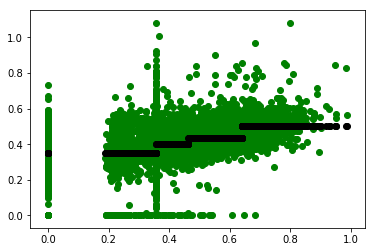

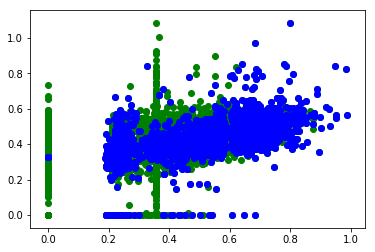

Std of artist_hotttnesss:  0.1267334418773045
regr_2:  [0.5666229]
regr_1:  [0.50457332]


In [87]:
length = len(df['song_hotttnesss'])
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=20)
x = df['song_hotttnesss'].values.reshape(length, 1)
y = df['artist_hotttnesss']
regr_1.fit(x, y)
regr_2.fit(x, y)
plts.scatter(x, y, color='g')
plts.scatter(x, regr_1.predict(x), color='k')
plts.show()
plts.scatter(x, y, color='g')
plts.scatter(x, regr_2.predict(x), color='b')
plts.show()
print('Std of artist_hotttnesss: ', df['artist_hotttnesss'].std())
print('regr_2: ', regr_2.predict([[1]]))
print('regr_1: ', regr_1.predict([[1]]))

The prediction is pretty good with a depth value of 2. It models the middle cluster like a step function. In the model with a depth value of 20, the data is extemely overfit which works well for values in the middle of the cluster. If we're trying to predict the artist_hotness of a song with a hotness value of 1 the values output by regr_1 and regr_2 are respectively 0.56 and 0.50. Given that the standard deviation of artist hotness is 0.12, the difference between the 2 values is within one standard deviation, so both models theoretically should work well, unless there is a dataset with a data point of 1 to verify our predictor's accuracy.